---
title: How to invent AB test
description: Как создать основы AB тестов с помощью монетки
date: "2025-02-23"
categories: [research]
---

# Введение 

Пару лет назад читал книгу - "[How to invent anything](https://www.howtoinventeverything.com/)" - Ryan North. Очень понравилась подача, что книга это инструкция по выживанию, которую кладут в машину времени, где описана куча достижений человеческой цивилизации и как их повторить, от определения съедобности растения и приручения животных до двигателей и станков. В ней были моменты философии и математики, но статистику не особо рассматривали, поэтому попробую в схожей манере описать путь создания AB тестов с помощью подручных средств, используя только элементарное моделирование. 

Погрузимся в контекст - 


In [44]:
import random

# Почему монетка

In [43]:
[random.binomialvariate() for _ in range(10)]


[1, 1, 0, 0, 1, 0, 1, 1, 1, 0]

In [ ]:
random.binomialvariate()

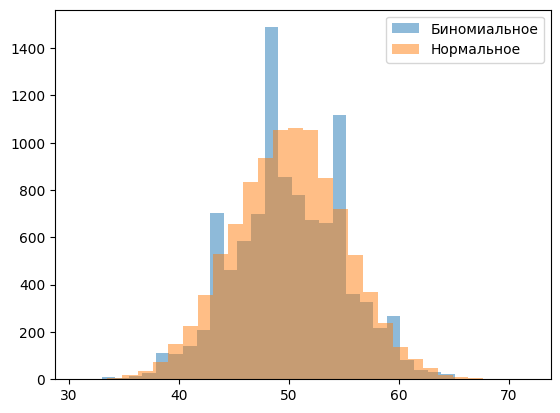

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm

# Параметры биномиального распределения
n = 100  # количество испытаний
p = 0.5  # вероятность успеха

# Генерация биномиальных данных
binom_data = binom.rvs(n, p, size=10000)

# Параметры нормального распределения, соответствующего биномиальному
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

# Генерация нормальных данных
norm_data = np.random.normal(mu, sigma, 10000)

# Визуализация
plt.hist(binom_data, bins=30, alpha=0.5, label='Биномиальное')
plt.hist(norm_data, bins=30, alpha=0.5, label='Нормальное')
plt.legend(loc='upper right')
plt.show()

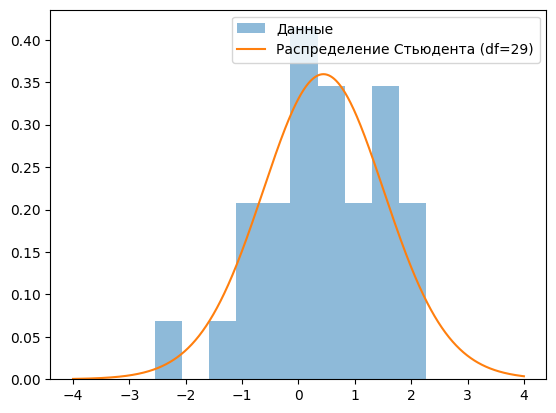

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Генерация данных
np.random.seed(0)
data = np.random.normal(0, 1, size=30)  # пример данных

# Параметры распределения Стьюдента
df = len(data) - 1  # число степеней свободы

# Оценка параметров
mean = np.mean(data)
std_err = np.std(data, ddof=1)

# Генерация значений распределения Стьюдента
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df, loc=mean, scale=std_err)

# Визуализация
plt.hist(data, bins=10, density=True, alpha=0.5, label='Данные')
plt.plot(x, y, label=f'Распределение Стьюдента (df={df})')
plt.legend()
plt.show()